**IMPORT NECESSARY LIBRARY**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**LOAD DATASET**

In [33]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [34]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.shape

(200, 5)

In [36]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**DATA PREPROCESSING**

In [39]:
# CustomerID column is not useful for cluserting ,so we remove that column
df=df.drop("CustomerID",axis=1)

In [40]:
la=LabelEncoder()
df['Genre']=la.fit_transform(df['Genre']) # convert into 1male and 0 female

In [41]:
#Scaling the data
scaler=StandardScaler()
scaled_features=scaler.fit_transform(df)

In [42]:
df_scaled=pd.DataFrame(scaled_features,columns=df.columns)
df_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


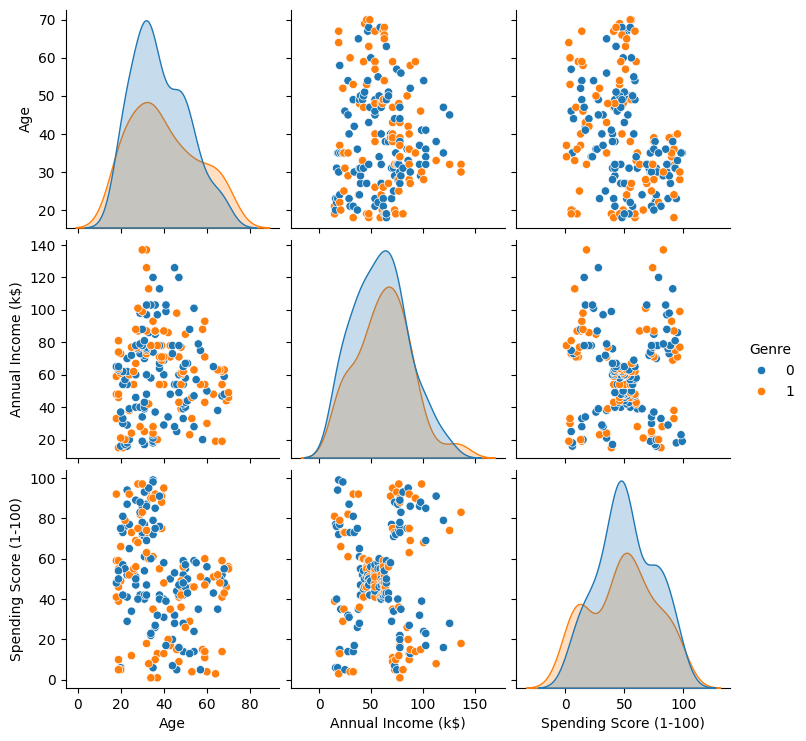

In [43]:
sns.pairplot(df,hue='Genre')
plt.show()

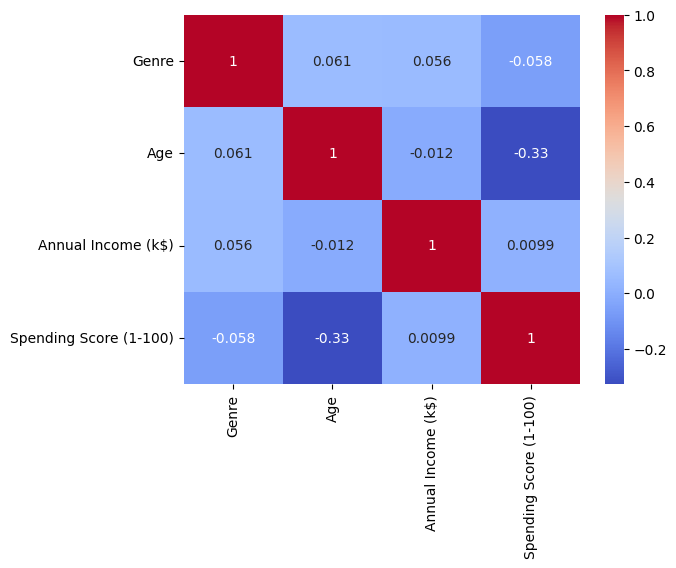

In [44]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**FIND OPTIMAL NO. OF CLUSTER BY USING ELBOW METHOD**

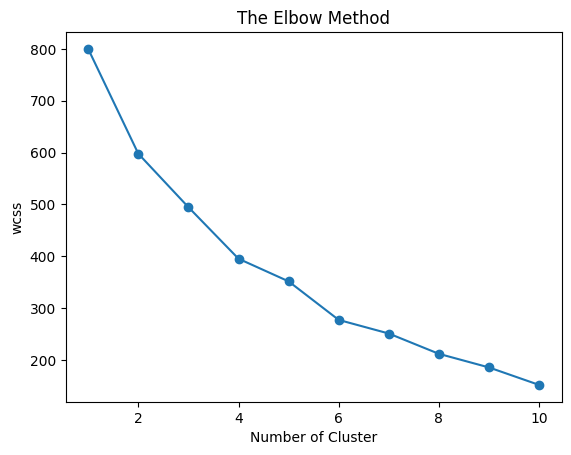

In [45]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

**TRAIN KMEAN WITH CHOOSE K=5**

In [50]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
cluster=kmeans.fit_predict(df_scaled)

In [51]:
df['cluster']=cluster
print(df.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0      1   19                  15                      39        2
1      1   21                  15                      81        2
2      0   20                  16                       6        4
3      0   23                  16                      77        4
4      0   31                  17                      40        4


**VISUALIZE THE CLUSTER (2D USING PCA)**

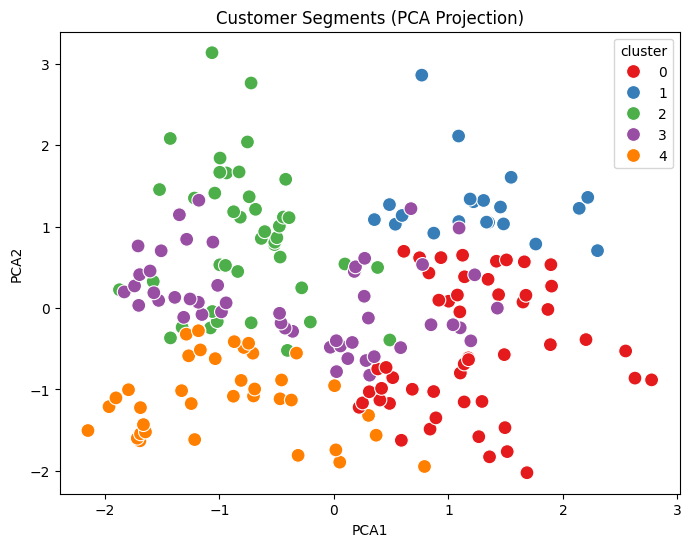

In [48]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components and cluster labels
pca_df=pd.DataFrame(data=pca_data,columns=['PCA1', 'PCA2'])
pca_df['cluster'] = cluster

# Plot the clusterS
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='cluster',palette='Set1',s=100)
plt.title('Customer Segments (PCA Projection)')
plt.show()